In [ ]:
%load_ext autoreload
%autoreload 2

import ncem

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.stats import ttest_rel, ttest_ind

usr = !echo $USER
grid_search_dir = '.'
datadir = '.'

grid_search_dir = "/storage/groups/ml01/workspace/anna.schaar/tissue/grid_searches_gen/"
datadir = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

import warnings
warnings.filterwarnings("ignore")

# Interaction model
 ## Figure 1 (d): Modeling cell communication as spatial cell state dependencies.

210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']


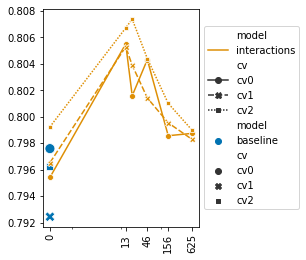

In [2]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN",
        "210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution = 400/1024
)
gs_linear.load_gs()

gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1": "baseline",
            "INTERACTIONS_MAX_NODES_IMAGE_1": "interactions",
        })
    ],
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0, 13, 46, 156, 625],
    plot_mode = 'lineplot',
)

## Paired t-test between baseline model and best spatial model

In [3]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_IMAGE_1")],
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1")],
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=7.293874940893317, pvalue=0.01828287301718189)


## Supp. Fig. 4 (a): Length scales of dependencies for different target cell-types.

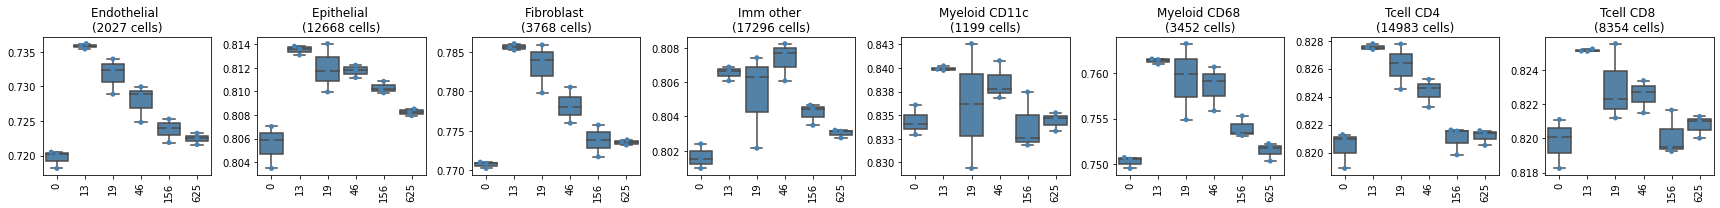

In [4]:
gs_linear.load_target_cell_evaluation()

gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

## Interpreter

In [5]:
clm = ncem.interpretation.InterpreterInteraction()
clm.load_model(
    results_path=grid_search_dir,
    gs_id="210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    cv_idx=0,
    model_id=test_id_interaction,
)
clm.get_data_again(data_path=datadir + "hartmann/", data_origin="hartmann")
clm.split_data_byidx_again(cv_idx=0)
clm.init_model_again()
clm.load_weights_again()
clm.reinitialize_model(changed_model_kwargs={'input_shapes': (8, 36, 64, 1, 0, 58)})

210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:02<00:00, 27.82it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
cross-validation selected: cv0
setting reinitialized layer weights to layer weights from model 210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


In [6]:
lm = ncem.interpretation.InterpreterInteraction()
lm.load_model(
    results_path=grid_search_dir,
    gs_id="210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN",
    cv_idx=0,
)
lm.get_data_again(data_path=datadir + "hartmann/", data_origin="hartmann")
lm.split_data_byidx_again(cv_idx=0)
lm.init_model_again()
lm.load_weights_again()
lm.reinitialize_model(changed_model_kwargs={'input_shapes': (8, 36, 64, 1, 0, 58)})

210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210419_interactions_baseline_none_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata
collecting image-wise celldata


  0%|          | 0/58 [00:00<?, ?it/s]

adding graph-level covariates


100%|██████████| 58/58 [00:01<00:00, 36.72it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 0.000000
cross-validation selected: cv0
setting reinitialized layer weights to layer weights from model 210419_interactions_baseline_none_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


## Supp. Fig. 9: Attributing cell heterogeneity to niche composition in Cd8 Tcells in colorectal cancer.

In [7]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='hartmann',
    data_path=datadir + 'hartmann/',
    radius=35,
    node_label_space_id='type',
    node_feature_space_id='standard',
    merge_node_types_predefined=True
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

adata, adata_substates, log_pval, fold_change = interpreter.data.compute_cluster_enrichment(
    image_key=['scMEP_point_1', 'scMEP_point_5', 'scMEP_point_8', 'scMEP_point_16'],
    target_cell_type='CD8 T cells',
    clip_pvalues=-5,
    n_neighbors=60,
    n_pcs=None
)

Loading data from raw files
registering celldata
collecting image-wise celldata


  0%|          | 0/58 [00:00<?, ?it/s]

adding graph-level covariates


  0%|          | 0/124 [00:00<?, ?it/s]

Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036

 Celldata metadata: {'lateral_resolution': 0.390625, 'fn': ['scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv', 'scMEP_sample_description.xlsx'], 'image_col': 'point', 'pos_cols': ['center_colcoord', 'center_rowcoord'], 'cluster_col': 'Cluster', 'cluster_col_preprocessed': 'Cluster_preprocessed', 'patient_col': 'donor'}


100%|██████████| 124/124 [00:49<00:00,  2.52it/s]


n cells:  1329
CD8 T cells 0    304
CD8 T cells 1    293
CD8 T cells 2    278
CD8 T cells 3    247
CD8 T cells 4    207
Name: CD8 T cells substates, dtype: int64


In [ ]:
adata_img, adata_CD8Tcells = clm.target_cell_relative_performance(
    image_key=['scMEP_point_1', 'scMEP_point_5', 'scMEP_point_8', 'scMEP_point_16'],
    baseline_model=lm,
    target_cell_type='CD8 T cells',
    n_neighbors=60,
    n_pcs=None,
)

  0%|          | 0/5507 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


 22%|██▏       | 1235/5507 [00:40<02:24, 29.64it/s]

In [ ]:
results = pd.merge(
    adata_substates.obs, adata_CD8Tcells.obs[['point', 'cell_id', 'relative_r_squared',]], on=["cell_id", "point"], how="left"
)
results.index = results.index.map(str)

adata_combined = adata_substates.copy()
adata_combined.obs = results
adata_combined.obs['CD8 T cells substates'].value_counts()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sc.set_figure_params(scanpy=True, fontsize=18)
sc.pl.umap(adata_combined, color='CD8 T cells substates', palette='tab10', ax=ax, show=False, title='')

In [ ]:
clm.plot_substate_performance(adata=adata_combined, target_cell_type='CD8 T cells')

In [ ]:
img_keys = ['scMEP_point_1', 'scMEP_point_5', 'scMEP_point_8', 'scMEP_point_16']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = ax.ravel()
for i, k in enumerate(img_keys):
    temp_adata = adata_img[adata_img.obs['point'] == k]
    sc.pl.spatial(
        adata_img[adata_img.obs['point'] == k].copy(),
        spot_size=30,
        ax=ax[i],
        show=False,
        na_color='whitesmoke',
        title=''
    )
    sc.pl.spatial(
        adata_combined[adata_combined.obs['point'] == k].copy(),
        color='CD8 T cells substates',
        spot_size=30,
        ax=ax[i],
        legend_loc='right margin' if i==len(img_keys)-1 else None,
        show=False,
        title=k,
    )
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = ax.ravel()
for i, k in enumerate(img_keys):
    temp_adata = adata_img[adata_img.obs['point'] == k]
    sc.pl.spatial(
        temp_adata[temp_adata.obs['Cluster_preprocessed'] != 'CD8 T cells'].copy(),
        spot_size=30,
        ax=ax[i],
        show=False,
        na_color='whitesmoke',
        title=''
    )
    sc.pl.spatial(
        temp_adata[temp_adata.obs['Cluster_preprocessed'].isin(['CD8 T cells', 'Epithelial'])].copy(),
        color='Cluster_preprocessed',
        spot_size=30,
        ax=ax[i],
        show=False,
        legend_loc='right margin' if i==len(img_keys)-1 else None,
        title=k,
        palette={'Epithelial': '#8c564b', 'CD8 T cells': '#d62728'}
    )
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
sc.set_figure_params(scanpy=True, fontsize=13)
ig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax = ax.ravel()
for i, k in enumerate(img_keys):
    temp_adata = adata_img[adata_img.obs['point'] == k]
    sc.pl.spatial(
        adata_img[adata_img.obs['point'] == k].copy(),
        spot_size=30,
        ax=ax[i],
        show=False,
        na_color='whitesmoke',
        title=''
    )
    sc.pl.spatial(
        adata_combined[adata_combined.obs['point'] == k].copy(),
        color='relative_r_squared',
        spot_size=30,
        cmap='coolwarm',
        norm=MidpointNormalize(midpoint=0.), 
        ax=ax[i],
        show=False,
        title=k
    )
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
# Save, show and return figure.
plt.tight_layout()
plt.show()

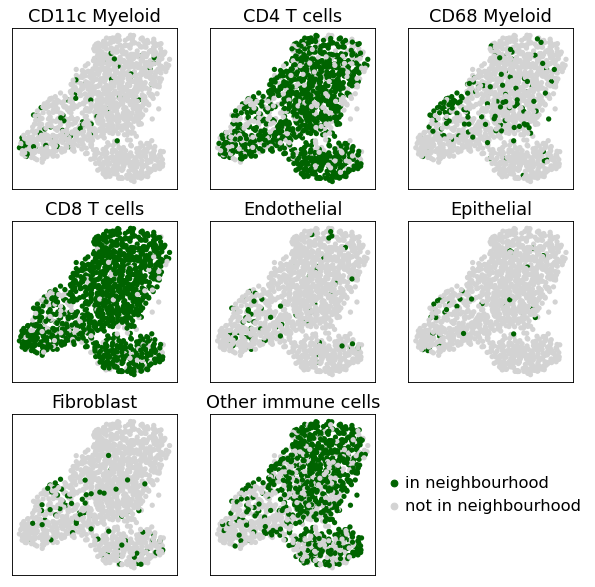

In [16]:
filter_titles = list(np.unique(interpreter.data.celldata.obs['Cluster_preprocessed']))
for i, x in enumerate(filter_titles):
    adata_combined.uns[f"source type {x}_colors"] = ['darkgreen', 'lightgrey']
sc.set_figure_params(scanpy=True, fontsize=16)
plt.ioff()
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9), )
N = len(filter_titles)
axs = axs.flat
for ax in axs[N:]:
    ax.remove()
ax = axs[:N]

for i, x in enumerate(filter_titles[:-1]):
    sc.pl.umap(
        adata_combined,
        color=f"source type {x}",
        title=x,
        show=False,
        #size=200,
        legend_loc='None',
        ax=ax[i]
    )
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
sc.pl.umap(
    adata_combined,
    color=f"source type {filter_titles[-1]}",
    title=filter_titles[-1],
    show=False,
    #size=50,
    ax=ax[N-1]
)
ax[N-1].set_xlabel('')
ax[N-1].set_ylabel('')
# Save, show and return figure.
plt.show()

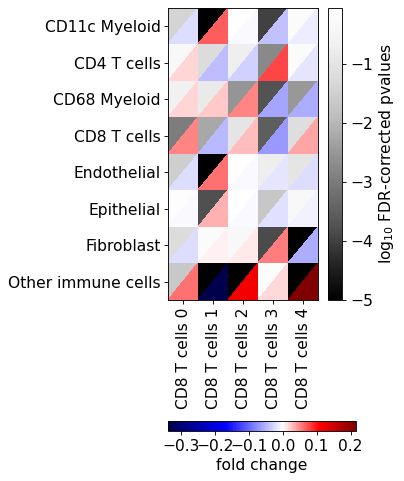

In [18]:
interpreter.data.cluster_enrichment(
    pvalues=log_pval, 
    fold_change=fold_change,
    fontsize=14,
    panel_width=3,
    panel_height=8,
    pad=0.25,
)

# Linear model

## Supp. Fig. 3: Linear models for spatial cell state dependencies.

210520_LINEAR_BASELINE_MAX_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
210520_LINEAR_MAX_NODES_IMAGE_1_HARTMANN: loaded 6 runs with 3-fold cross validation
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_IMAGE_1'], given was ['LINEAR_BASELINE_MAX_NODES_IMAGE_1']


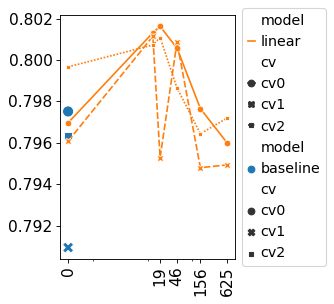

In [19]:
plt.rcParams.update({"axes.grid" : False})
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210520_LINEAR_BASELINE_MAX_NODES_IMAGE_1_HARTMANN",
        "210520_LINEAR_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution = 400/1024
)
gs_linear.load_gs()

gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='linear',
    baseline_model_class='linear_baseline',
    rename_levels = [
        ("model", {
            "LINEAR_BASELINE_MAX_NODES_IMAGE_1": "baseline",
            "LINEAR_MAX_NODES_IMAGE_1": "linear",
        })
    ],
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[0, 19, 46, 156, 625],
    plot_mode = 'lineplot',
)

# Encoder-decoder NCEM models
## Figure 3 (b): Nonlinear models of spatial dependencies of expression states.

210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation


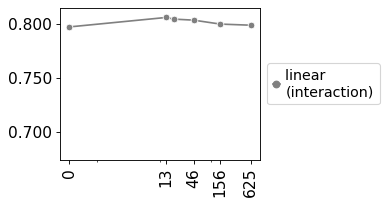

In [20]:
gs_interaction = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=400/1024
)
gs_interaction.load_gs()

gs_interaction.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_IMAGE_1": "linear \n(interaction)",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.674, 0.815),
    plot_mode = 'mean_lineplot',
    xticks=[  0,  13,  46, 156, 625],
)

210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN: loaded 12 runs with 3-fold cross validation
210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN: loaded 26 runs with 3-fold cross validation
subset was empty, available values for model are ['CLVMNP_MAX_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']


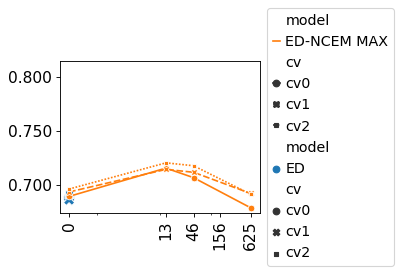

In [21]:
gs_lvmnp = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN",
        "210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=400/1024
)
gs_lvmnp.load_gs()

gs_lvmnp.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_IMAGE_1": "ED",
            "CLVMNP_MAX_NODES_IMAGE_1": "ED-NCEM MAX",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.674, 0.815),
    plot_mode = 'lineplot',
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
    xticks=[  0,  13,  46, 156, 625],
)


210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN: loaded 12 runs with 3-fold cross validation
210119_CLVMNP_GCN_NODES_IMAGE_1_HARTMANN: loaded 32 runs with 3-fold cross validation
subset was empty, available values for model are ['CLVMNP_GCN_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']


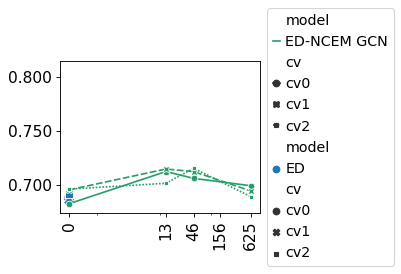

In [22]:
gs_lvmnp = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN",
        "210119_CLVMNP_GCN_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=400/1024
)
gs_lvmnp.load_gs()

gs_lvmnp.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_IMAGE_1": "ED",
            "CLVMNP_GCN_NODES_IMAGE_1": "ED-NCEM GCN",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.674, 0.815),
    plot_mode = 'lineplot',
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
    xticks=[  0,  13,  46, 156, 625],
)

## Paired t-test between baseline model and best spatial model

In [23]:
gs_ed_ncem = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN",
        "210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN",
        "210119_CLVMNP_GCN_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=1
)
gs_ed_ncem.load_gs()

210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN: loaded 12 runs with 3-fold cross validation
210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN: loaded 26 runs with 3-fold cross validation
210119_CLVMNP_GCN_NODES_IMAGE_1_HARTMANN: loaded 32 runs with 3-fold cross validation


In [24]:
test_id_ed = gs_ed_ncem.get_best_model_id(
    subset_hyperparameters=[("model", "LVMNP_NONE_NODES_IMAGE_1")],
)
ed_test_r2 = np.array(
    gs_ed_ncem.summary_table[gs_ed_ncem.summary_table["run_id"] ==test_id_ed]['test_r_squared_linreg']
)
test_id_ed_ncem_max = gs_ed_ncem.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_MAX_NODES_IMAGE_1")],
)
ed_ncem_max_test_r2 = np.array(
    gs_ed_ncem.summary_table[gs_ed_ncem.summary_table["run_id"] ==test_id_ed_ncem_max]['test_r_squared_linreg']
)

test_id_ed_ncem_gcn = gs_ed_ncem.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_GCN_NODES_IMAGE_1")],
)
ed_ncem_gcn_test_r2 = np.array(
    gs_ed_ncem.summary_table[gs_ed_ncem.summary_table["run_id"] ==test_id_ed_ncem_gcn]['test_r_squared_linreg']
)

print('ED-NCEM MAX:', ttest_rel(ed_ncem_max_test_r2, ed_test_r2))
print('ED-NCEM GCN:', ttest_rel(ed_ncem_gcn_test_r2, ed_test_r2))

ED-NCEM MAX: Ttest_relResult(statistic=13.99895403364687, pvalue=0.005064074601484572)
ED-NCEM GCN: Ttest_relResult(statistic=5.127340627548463, pvalue=0.03599652697206592)


## Unpaired t-test between interaction model and best spatial model

In [25]:
test_id_interaction = gs_interaction.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_IMAGE_1")]
)
interaction_test_r2 = np.array(
    gs_interaction.summary_table[gs_interaction.summary_table["run_id"]==test_id_interaction]['test_r_squared_linreg']
)
print('ED-NCEM MAX:', ttest_ind(ed_ncem_max_test_r2, interaction_test_r2))
print('ED-NCEM GCN:', ttest_ind(ed_ncem_gcn_test_r2, interaction_test_r2))

ED-NCEM MAX: Ttest_indResult(statistic=-46.69687659557861, pvalue=1.2579788249180536e-06)
ED-NCEM GCN: Ttest_indResult(statistic=-33.9112751091817, pvalue=4.510879768982605e-06)
